<a href="https://colab.research.google.com/github/moombach/ML/blob/main/Copy_of_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

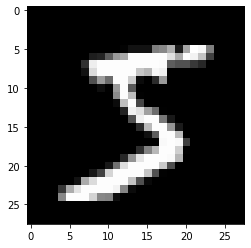

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

In [ ]:
from sklearn.model_selection import train_test_split

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((5000, 28, 28), (5000, 28, 28), (5000,), (5000,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=12, max_depth=6).fit(X_train.reshape((60000, -1)), y_train)
rf_train_preds = rf.predict(X_train.reshape((60000, -1)))
rf_val_preds = rf.predict(X_val.reshape((5000, -1)))
accuracy_score(rf_train_preds, y_train), accuracy_score(rf_val_preds, y_val)

(0.8565, 0.8582)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(rf_val_preds, y_val))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       524
           1       0.97      0.87      0.92       604
           2       0.84      0.86      0.85       498
           3       0.82      0.83      0.82       494
           4       0.79      0.83      0.81       465
           5       0.71      0.91      0.79       355
           6       0.91      0.87      0.88       519
           7       0.90      0.90      0.90       516
           8       0.81      0.84      0.82       493
           9       0.85      0.79      0.81       532

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [ ]:
rf_test_preds = rf.predict(X_test.reshape((5000, -1)))
accuracy_score(rf_test_preds, y_test)

0.8574

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf, X_train.reshape((60000, -1)), y_train, cv=10, scoring='f1_macro')

array([0.86059349, 0.84246262, 0.83287781, 0.85931726, 0.84938262,
       0.83539899, 0.84279782, 0.84526565, 0.84450675, 0.89049893])

In [ ]:
rf_final = RandomForestClassifier(n_estimators=12, max_depth=6).fit(X_train.reshape((60000, -1)), y_train)
rf_final_test_preds = rf_final.predict(X_test.reshape((10000, -1)))
print(classification_report(rf_final_test_preds, y_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1081
           1       0.98      0.90      0.94      1235
           2       0.83      0.88      0.85       980
           3       0.82      0.81      0.82      1020
           4       0.84      0.84      0.84       974
           5       0.72      0.86      0.78       743
           6       0.87      0.88      0.88       949
           7       0.87      0.86      0.86      1031
           8       0.80      0.82      0.81       949
           9       0.83      0.80      0.81      1038

    accuracy                           0.86     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.86      0.86      0.86     10000

